In [1]:
import numpy as np
import scipy
import librosa
import matplotlib.pyplot as plt
import IPython.display as ipd

## Numpy array operations

In [2]:
zeros = np.zeros((1,1,100))

print(f"shape: {zeros.shape}")
print(f"array: {zeros}")

shape: (1, 1, 100)
array: [[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0.]]]


In [3]:
ones = np.ones((3,2))

print(f"shape: {ones.shape}")
print(f"array: {ones}")

shape: (3, 2)
array: [[1. 1.]
 [1. 1.]
 [1. 1.]]


In [4]:
array1 = np.array([[2, 3],
                  [1, 2],
                  [2, 4]])

print(f"shape: {array1.shape}")
print(f"array: {array1}")

shape: (3, 2)
array: [[2 3]
 [1 2]
 [2 4]]


In [5]:
array2 = np.array([[1, 2, 3],
                  [4, 5, 6]])

print(f"shape: {array2.shape}")
print(f"array: {array2}")

shape: (2, 3)
array: [[1 2 3]
 [4 5 6]]


In [6]:
print(f"row 0, all columns: {array2[0, :]}")
print(f"row 1, all columns: {array2[1, :]}")
print(f"row 0, columns 0, 1: {array2[0,:2]}")
print(f"row 0, columns 1, 2: {array2[1, 1:]}")


row 0, all columns: [1 2 3]
row 1, all columns: [4 5 6]
row 0, columns 0, 1: [1 2]
row 0, columns 1, 2: [5 6]


In [7]:
array3 = ones + array1

print(f"shape: {array3.shape}")
print(f"array: {array3}")

shape: (3, 2)
array: [[3. 4.]
 [2. 3.]
 [3. 5.]]


In [8]:
array4 = np.dot(array2, array3)  ## Matrix dot multiplication

print(f"shape: {array4.shape}")
print(f"array: {array4}")

shape: (2, 2)
array: [[16. 25.]
 [40. 61.]]


In [9]:
array5 = array3 * array1  ## Matrix element by element multiplication

print(f"shape: {array5.shape}")
print(f"array: {array5}")

shape: (3, 2)
array: [[ 6. 12.]
 [ 2.  6.]
 [ 6. 20.]]


## Librosa loading audio files 

In [10]:
signal, sample_rate = librosa.load("piano_c.wav")
print(f"shape: {signal.shape}")
print(f"sample rate, sr, sampling frequency: {sample_rate}Hz")

shape: (33968,)
sample rate, sr, sampling frequency: 22050Hz


In [11]:
ipd.Audio(data=signal, rate=sample_rate)

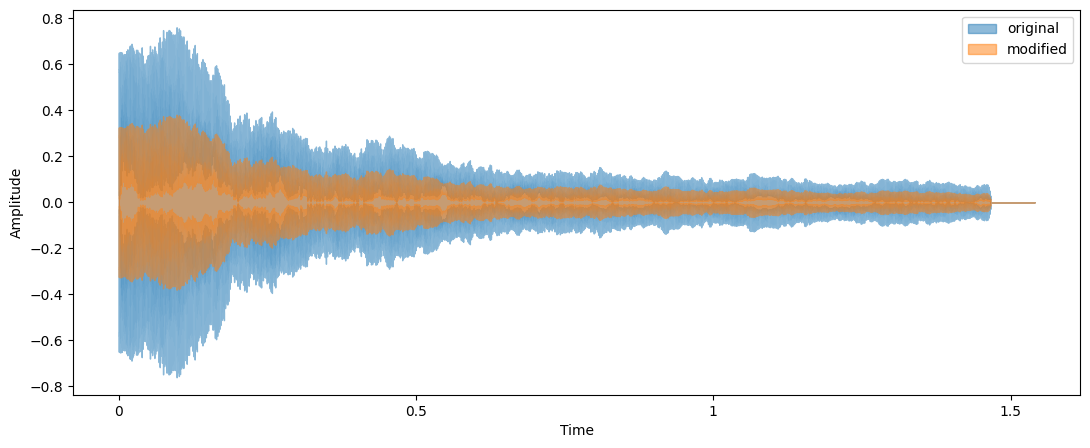

In [12]:
plt.figure(figsize=(13, 5))
plt.ylabel("Amplitude")
librosa.display.waveshow(signal, sr=sample_rate, alpha=0.5, marker="s", label = "original")
librosa.display.waveshow( 0.5 * signal, sr=sample_rate, alpha=0.5, marker="s", label = "modified")
plt.legend()
plt.show()

### Exporting audio files

In [17]:
scipy.io.wavfile.write("piano_amplt_modified.wav", sample_rate, 0.5 * signal)
ipd.Audio(filename="piano_amplt_modified.wav", rate=sample_rate)

## Fast Fourier Transform

In [18]:
fft = scipy.fft.fft(signal)
magnitude = np.abs(fft)
frequency = np.linspace(0, sample_rate, len(magnitude)) 

print(f"magnitude shape: {magnitude.shape}")
print(f"frequency shape: {frequency.shape}")
print(f"fft: {fft}")
print(f"magnitude: {magnitude}")

magnitude shape: (33968,)
frequency shape: (33968,)
fft: [-42.619125 -0.j        -34.297115 +6.560215j  -29.963585 +7.4250374j ...
 -27.411749-12.946169j  -29.963585 -7.4250374j -34.297115 -6.560215j ]
magnitude: [42.619125 34.918884 30.86985  ... 30.315132 30.86985  34.918884]


### Power spectrum

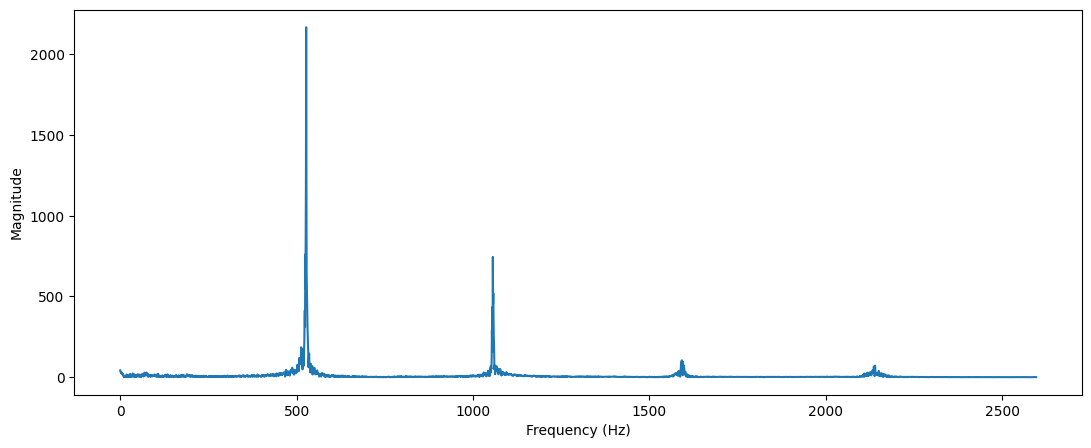

In [19]:
plt.figure(figsize=(13, 5))
plt.plot(frequency[:4000], magnitude[:4000]) # magnitude spectrum
# plt.plot(frequency, magnitude)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

### Spectogram

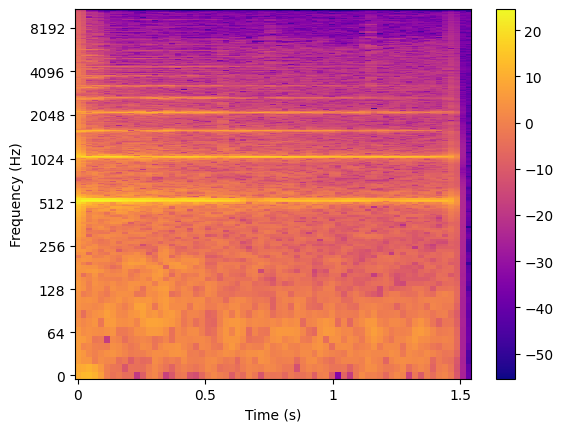

In [20]:
spec = librosa.stft(signal)
spec = np.abs(spec)
spec = librosa.power_to_db(spec)
librosa.display.specshow(spec,sr=sample_rate,x_axis="time", y_axis="log", cmap='plasma')
plt.ylabel("Frequency (Hz)")
plt.xlabel("Time (s)")
plt.colorbar()

In [21]:
violin, sample_rate= librosa.load("violin_c.wav")

print(f"shape: {violin.shape}")
print(f"length: {len(violin )/ sample_rate:.2f} s")

shape: (59772,)
length: 2.71 s


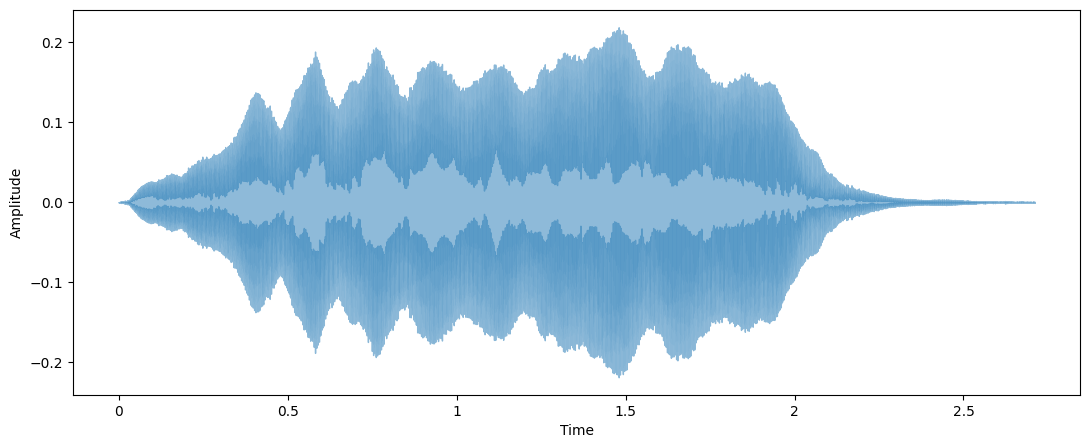

In [22]:
plt.figure(figsize=(13, 5))
plt.ylabel("Amplitude")
librosa.display.waveshow( violin, sr=sample_rate, alpha=0.5, marker="s")
plt.show()

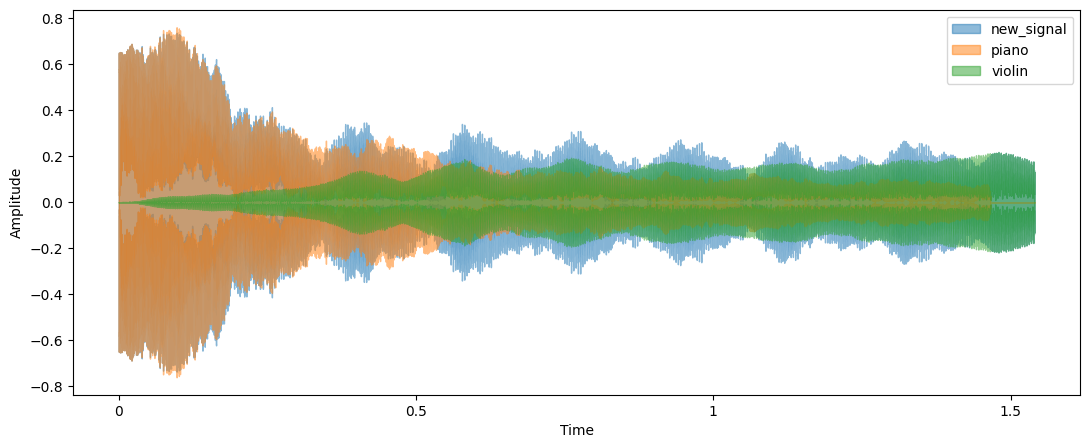

In [23]:
violin = violin[:int(len(signal))]

new_signal = signal + violin
plt.figure(figsize=(13, 5))
plt.ylabel("Amplitude")
librosa.display.waveshow( new_signal, sr=sample_rate, alpha=0.5, label="new_signal")
librosa.display.waveshow( signal, sr=sample_rate, alpha=0.5, label="piano")
librosa.display.waveshow( violin, sr=sample_rate, alpha=0.5, label="violin")

plt.legend()
plt.show()

In [24]:
piano_mag = magnitude
violin_fft = scipy.fft.fft(violin)
violin_mag = np.absolute(violin_fft)

new_signal_fft = scipy.fft.fft(new_signal)
new_signal_mag = np.absolute(new_signal_fft)

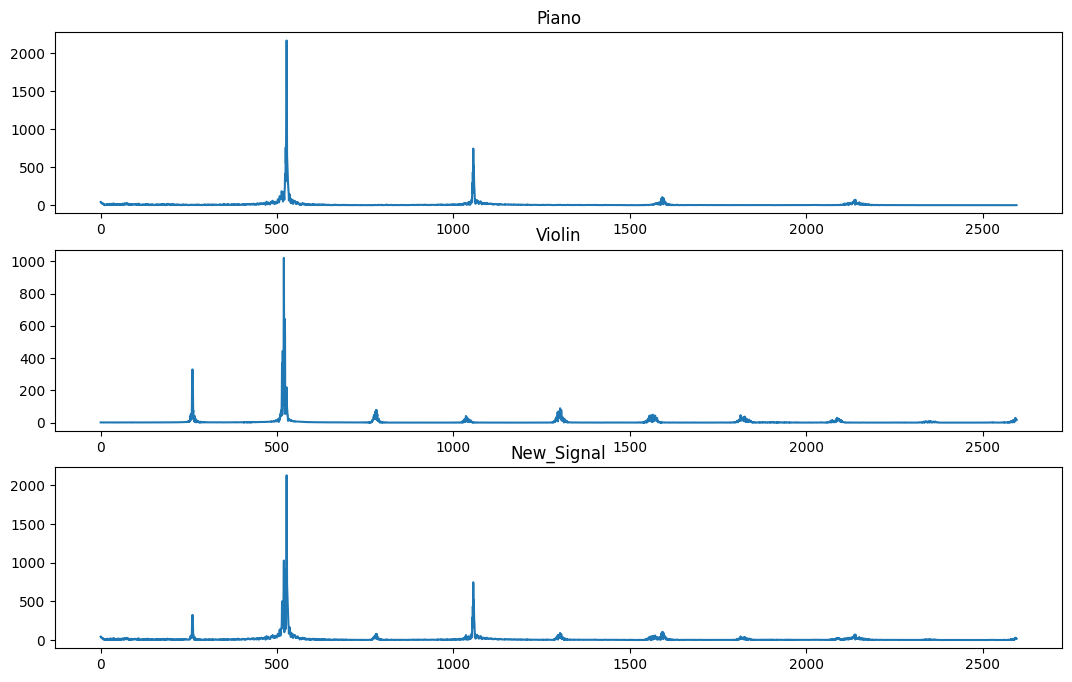

In [25]:
figure, axis = plt.subplots(3)
figure.set_figheight(8)
figure.set_figwidth(13)

axis[0].plot(frequency[:4000], magnitude[:4000], label = "piano")
axis[0].set_title("Piano")

axis[1].plot(frequency[:4000], violin_mag[:4000], label = "violin")
axis[1].set_title("Violin")

axis[2].plot(frequency[:4000], new_signal_mag[:4000], label = "new_signal")
axis[2].set_title("New_Signal")

plt.show()